# Программирование на Python

# Цикл `for`. Списки и кортежи. Списковые включения. Функция `map()`.


*Автор: Паршина Анастасия, НИУ ВШЭ*

*Дополнили: Трошин Даниил, Капустина Лика, НИУ ВШЭ*

## Содержание


1. [Типы данных — часть 3. Списки и кортежи](#par1)
2. [Методы строк (`.join()` и `.split()`)](#par2)
2. [Цикл `for` и функция `range()`](#par3)
3. [Списковые включения](#par4)
4. [И напоследок про `map()`](#par5)
5. [PS: методы списков](#par6)
6. [Дополнительные материалы](#parlast)

## Типы данных — часть 3. Списки и кортежи <a name="par1"></a>

Ранее мы уже обсуждали списки и кортежи в разговоре о типах данных. Тогда основное отличие заключалось в том, что списки — это изменяемый тип данных, а кортежи — неизменяемый. Проверить, что кортежи нельзя изменить, очень просто:

In [ ]:
(1, 2, 3)[0] # индексация работает

1

In [ ]:
(1, 2, 3)[0] = 0 # а вот попытка изменить кортеж (заменить его элемент) выдает ошибку

TypeError: 'tuple' object does not support item assignment

Синтаксис словаря (на английскойм – *tuple*) выглядит так, а для его создания вам нужно использовать круглые скобки:

```my_tuple = (1, 2, 3, 4, 5)```

Вы можете также создать кортеж с помощью функции `tuple()`:

```tuple([1, 2, 3, 4, 5])  # создаем кортеж из списка```

Оба типа данных представляют собой последовательности, однако кортеж — это неизменяемый и более быстрый аналог списка. Он защищает хранимые данные от непреднамеренных изменений и может использоваться в качестве ключа в словарях.

In [ ]:
import timeit # импортируем модуль timeit

# измеряет, за сколько секунд запустится этот код number раз
print(timeit.timeit('x = (1,2,3,4,5,6,7,8,9)', number=100000)) # когда создаем кортеж
print(timeit.timeit('x = [1,2,3,4,5,6,7,8,9]', number=100000)) # когда создаем список

0.0033723829999985355
0.010176925999985542


Также, если функция возвращает несколько значений, то делает она это в виде кортежа.

In [ ]:
import math     # импортируем модуль math
math.modf(2.34) # к слову, как вы думаете, что делает эта функция?

(0.33999999999999986, 2.0)

Методы `.index()`, `.count()` и функция `len()` работают как с кортежами, так и со списками.

In [ ]:
A = (1, 2, 4) # создаем кортеж A

print(len(A)) # длина кортежа A
print(A.count(1)) # сколько раз число 1 встречается в кортеже A
print(A.index(1)) # возвращает индекс целого числа 1 в кортеже A

3
1
0


## Методы строк (`.join()` и `.split()`) <a name="par2"></a>

Со списками работает больше методов, все их обсудим в следующий раз. Пока остановимся только на двух, которые на данный момент могут представлять интерес, они оба имеют оношение к спискам, однако являются методами строк. Речь идет про `.join()` и `split()`.

Чтобы создать список, нужно использовать квадратные скобки и поместить внутрь какие-то значения:

```products = ["яблоки", "бананы", "апельсины"]```

```numbers = [1, 2, 3]```

Вы можете также создать список из кортежа с помощью функции `list()`. Например:

```numbers = list((1, 2, 3)) # результат - [1, 2, 3]```

Можно создать список из строки. Например:

```list('abcde') # ['a', 'b', 'c', 'd', 'e']```

Метод `.join()` из списка <b>строк</b> делает строку.

In [ ]:
products = ["яблоки", "бананы", "апельсины"] # внутри списка products только строки
', '.join(products) # объединяем эти строки в списке в одну большую строку

'яблоки, бананы, апельсины'

Фактически метод применяется к строке `', '` и говорит — используй эту строку в качестве разделителя между другими строками нашего списка.

In [ ]:
', '.join(["яблоки", 111, "апельсины"]) # ошибка TypeError

TypeError: sequence item 1: expected str instance, int found

Если же мы попытаемся объединить так список, состоящий не только из строк, то программа выдаст уже известную нам ошибку.

У этого метода есть еще пара нюансов, которые стоит запомнить. Помните про форматирование строки и f-строки? Попробуем подставить в такую запись `.join()`.

In [ ]:
print(f'В магазине надо купить: {', '.join(products)}') # внутри одинарные кавычки

SyntaxError: f-string: expecting '}' (<ipython-input-18-d0b3e6949be9>, line 1)

Это тот случай, где кавычки важны! Обратите внимание ошибка возникла потому, что f-строка подумала, что она заканчивается вот здесь `В магазине надо купить: {'` и при этом не нашла закрывающуюся скобочку `}`. Как решить проблему? Например, использовать в `.join()` двойные кавычки.

In [ ]:
print(f'В магазине надо купить: {", ".join(products)}') # внутри двойные кавычки

В магазине надо купить: яблоки, бананы, апельсины


И второй нюанс в том, что визуально может быть похоже следующее:

In [ ]:
print(", ".join(products))   # печатаем строку
print(*products, sep = ', ') # распаковываем список

яблоки, бананы, апельсины
яблоки, бананы, апельсины


В первом случае у нас создается строка, во втором — мы просто распаковываем имеющийся список.

Метод `split()` работает в обратную сторону — он буквально разделит нашу строку, и по умолчанию сделает это по пробелам.

In [ ]:
years = input()        # вводим какое-то значение
years = years.split()  # разбиваем строку (по умолчанию - по пробелу)
print(years)           # печатаем получившийся результат

1258   1638        1729   982
['1258', '1638', '1729', '982']


Во-первых, обращаем внимание, что убираются все пробелы между символами.

Во-вторых, это все можно было записать в одну строку вот так:

In [ ]:
print(input().split()) # только тут у нас не создается переменная

1258   1638        1729   982
['1258', '1638', '1729', '982']


In [ ]:
print(input().split(', ')) # а еще можно использовать другое разделитель - например, запятую с пробелом

1258   1638        1729   982
['1258   1638        1729   982']


Если тоже самое «разделить» по запятой с пробелом, то получится список, состоящий из одной строки. Однако, если бы в ней были `, `, то наш метод также бы разделил по ним строку.

Вернемся к нашему списку `years` и попробуем вытащить оттуда максимальное значение:

In [ ]:
max(years)

'982'

Ой, что-то пошло не так. Это связано с тем, что было вытащено максимальное/первое значение по алфавиту, ведь мы работаем со строками. Нужно попробовать переделать наш список в список целых чисел. Быстрее всего это сделать с помощью функции `map()`, однако сначала рассмотрим, как будет работать цикл `for`.

<center><b><font size=4>Задача №1</font></b></center>

**Напишите программу, которая будет спрашивать у пользователя фамилии друзей, с которыми он общался за последнюю неделю и выводит справочную информацию о ваших друзьях:**

* Информация считывается с помощью функции `input()`;

* Отсортировать значения вы можете с помощью функции `sorted()`;

* Фамилии ваших друзей будут разделены запятой с пробелом;

* Гарантируется, что будут введены только строки.

**Ориентируйтесь на тесты ниже:**
<center>
    <table>
        <tr>
            <th><center>Ввод</center></th>
            <th><center>Результат</center></th>
        </tr>
        <tr><td><p>Музыка, Морозов, Егерева</p></td>
            <td><p>За последнюю неделю вы общались с 3 друзьями.</p>
<p>Отсортированный список ваших друзей: ['Егерева', 'Морозов', 'Музыка']</p></td></tr>
        <tr><td>Федоров, Смирнов, Иванов, Потапов, Кузнецов</td>
            <td><p>За последнюю неделю вы общались с 5 друзьями.</p>
                <p>Отсортированный список ваших друзей: ['Иванов', 'Кузнецов', 'Потапов', 'Смирнов', 'Федоров'</p></td></tr>
        <tr><td>        
            <p>Сато, Като, Ёсида, Исикава, Ито, Оота</p></td>
            <td><p>За последнюю неделю вы общались с 6 друзьями.</p>
<p>Отсортированный список ваших друзей: ['Ёсида', 'Исикава', 'Ито', 'Като', 'Оота', 'Сато']</p></td></tr>
    </table>
</center>

In [ ]:
#YOUR CODE HERE

## Цикл `for` и функция `range()` <a name="par3"></a>

Цикл `for` буквально можно воспринимать следующим образом `для каждого элемента последовательности сделай что-то`. Под последовательностью здесь понимается <b>итерируемый объект</b> т.е. буквально тот, который вы можете растащить на части (например, строку можно раcтащить на символы, список — на элементы списка, кортеж — на элементы кортежа, словарь — на пары ключ-значение).

Небольшое уточнение — разница между последовательностями и итерируемымыи объектами заключается в том, что в последовательностях элементы упорядочены.

Попробуем перебрать все элементы нашего списка `years` и напечатать каждый.

In [ ]:
years = ['1258', '1658', '1729', '982'] # создаем список years

for y in years: # для каждого элемента в years
    print(y) # печатаем этот элемент

1258
1658
1729
982


Разберемся с тем, что только что произошло.

Во-первых, у нас прошло четыре <b>итерации</b> цикла, то есть четыре повторения цикла. Воспринимается это так:

<i>Итерация №1</i>

    y = '1258'
    print(y) # 1258
    
<i>Итерация №2</i>

    y = '1638'
    print(y) # 1638
    
<i>Итерация №3</i>

    y = '1729'
    print(y) # 1729
    
<i>Итерация №4</i>

    y = '982'
    print(y) # 982
    
Во-вторых, подумайте, что сейчас хранится в переменной `y`?    

In [ ]:
print(y)

982


В нашей переменной сохранилось именно последнее значение, которое она приняла в цикле. Фактически нам это не особо важно: сама переменная важна лишь внутри самого цикла, она там создается, потом с ней что-то происходит (в нашем случае мы ее печатаем), и затем мы о ней забываем.

Доказать, что это буквально новая переменная, а не элемент списка, можно следующим образом.  

In [ ]:
print(years) # печатаем список

for y in years: # печатаем
    y = y + '1'
    print(y)

print(years)

['1258', '1658', '1729', '982']
12581
16581
17291
9821
['1258', '1658', '1729', '982']


Обратите внимание, что элементы списка не изменились. В цикле менялась только переменная `y`, там же она печаталась, а потом принимала новое значение.

В-третьих, как цикл понимает, что пора остановиться? Ведь мы не прописываем никакое условие и не прописываем `break`. Сейчас будет сложно.

У итерируемых объектов есть итератор. Мы можем сказать, что **итератор — это объект, позволяющий реализовать поток данных и предлагающий возможность двигаться по нему.**

In [ ]:
years_iterator = iter(years)
print(years_iterator)

Для реализации протокола итератора изпользуется встроенная функция `next()`. По сути, это инструмент для прохода по потоку данных, в нашем случае — по всем элементам списка.

Когда мы дойдем до конца, она вызовет специальное исключение `StopIteration`, сигнализирующее о том, что итератор исчерпал все доступные ему значения.

In [ ]:
print(next(years_iterator)) # первый элемент списка
print(next(years_iterator)) # второй элемент списка
print(next(years_iterator)) # третий элемент списка
print(next(years_iterator)) # последний элемент списка
print(next(years_iterator)) # упс, элемент списка кончились

1258
1658
1729
982


StopIteration: 

Собственно, цикл `for` умеет ловить это исключение и останавливаться.

По сути, цикл `for` — красивая «обертка» вот этого:

In [ ]:
years_iterator = iter(years)
running = True

while running:
    try:
        year = next(years_iterator)
        print(year)
    except StopIteration:
        running = False

1258
1658
1729
982


(сейчас не обязательно понимать про `try`, `except`, вообще про исключения: важно просто понять, что цикл `for` итерируется по элементам объекта, пока они не закончатся)

В целом цикл `for` всегда можно заменить на цикл `while` (но не наоборот), в таком случае цикл `while` просто будет немного длиннее. Вспомним задачку с рисованием с прошлого семинара.

In [ ]:
# цикл while
h = 7
w = h + 2
m = w // 4
i = 1
while i <= h:
    if (i <= m):
      print(" " * (m-i) + "*" * (2*i) + " " * (w-2*i-2*m) + "*" *(2*i) + " " * (m-i))
    else:
      print(" " * (i - 2*m+1) + "*" * (w-2*(i-2*m+1)) + " " * (i - 2*m+1))
    i += 1

 **   ** 
**** ****
*********
 ******* 
  *****  
   ***   
    *    


**Теперь, когда мы, вроде как, поняли, что лежит внутри цикла `for`, подумаем, а как в итоге заменить элементы списка.**

В этом нам поможет индексация. Как создать набор индексов? Тут есть два способа:

1. функция `range()`
2. функция `enumerate()`

Первая универсальнее, так как буквально создает диапазон значений от и до (даже может сделать его с определенным шагом). При работе с ней нужно запомнить следующее:

   `range(START, STOP, STEP)`
   
   + `START` — начало нашего диапазона
   + `STOP` — конец нашего диапазона (не включается!)
   + `STEP` — шаг, с которым мы идем

In [ ]:
# например, сделаем диапазон целых чисел от 1 до 10 с шагом 2
# то есть возьем все нечетные числа от 1 до 10
for i in range(1, 11, 2):
    print(i)

1
3
5
7
9


In [ ]:
# значения, которые можно подставить вместо «индексов» можно создать так:
for i in range(len(years)):
    print(i)

0
1
2
3


В примере выше важно следующее:
+ по умолчанию в значение `START` подставляется `0`;
+ как раз тут важно, что последнее значение (`4`) не включается — если бы включалось, то подставив его вместо индекса в список `years`, мы бы получили ошибку `IndexError`:

In [ ]:
print(years[4])

IndexError: list index out of range

Функция `enumerate()` вернет нам пару индекс-элемент, впредставленную в виде кортежа.

In [ ]:
for i in enumerate(years):
    print(i)
    print(f'Индексу {i[0]} соответствует элемент {i[1]}') # так можно разбить эту пару

(0, '1258')
Индексу 0 соответствует элемент 1258
(1, '1658')
Индексу 1 соответствует элемент 1658
(2, '1729')
Индексу 2 соответствует элемент 1729
(3, '982')
Индексу 3 соответствует элемент 982


Вернемся к идее поменять строки на целые числа в нашем списке `years`.

In [ ]:
print(years)

for i in range(len(years)):
    years[i] = int(years[i])

print(years)

['1258', '1658', '1729', '982']
[1258, 1658, 1729, 982]


В цикле у нас создается переменная `i`, однако она используется для обращения к объектам списка, которые мы непосредственно изменяем.



<center><b><font size=4>Задача №2</font></b></center>

**Используйте функцию `range()`, превратите последовательность в список с помощью функции `list()` и напечатайте:**

* Список от 1 до 5 включительно: `[1, 2, 3, 4, 5]`;
* Список от 8 до 12 невключительно: `[8, 9, 10, 11]`;
* Список от 1 до 10 включительно только с нечетными числами: ```[1, 3, 5, 7, 9]```;
* Список от 1 до 10 включительно только с четными числами: `[2, 4, 6, 8, 10]`;
* Список от 100 до 130 включительно с шагом `3`: `[100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130]`.


*Подсказки:*
* Чтобы вывести четные и нечетные числа или последовательности с определенным шагом, пользуйтесь третьим аргументом функции `range()`;
* Чтобы получить справку по функции, пользуйтесь функцией `help()` или запросите справку с помощью `Shift + Tab`.

In [ ]:
# YOUR CODE HERE

## Списковые включения <a name="par4"></a>

Если мы не хотим изменять текущий список, а хотим сохранить значения в новый, то это можно сделать так:

In [ ]:
years = input().split()

int_years = []

for i in range(len(years)):
    int_years.append(int(years[i]))

print(years)
print(int_years)

1258   1638        1729   982
['1258', '1638', '1729', '982']
[1258, 1638, 1729, 982]


Да, уже выглядит сложнее. Здесь мы создаем пустой список, в который складываем наши новые объекты. Метод `.append()` мы уже встречали (он в конец списка добавляет новые значения). Более подробно о методах поговорим в следующий раз!

Код безумно длинный (да-да!). Его можно записать в одну строчку, используя списковые включения.

In [ ]:
int_years_2 = [int(years[i]) for i in range(len(years))]
print(int_years_2)

[1258, 1638, 1729, 982]


Мы буквально создаем пустой список, говорим, положи туда `int(years[i])`, а потом указываем, откуда это `i` берется.

Списковые включения достаточно короткая конструкция. Максимум — можно добавить в него условие.

In [ ]:
# вот так добавляется просто if
even_numbers = [i for i in range(1, 11) if i%2 == 0]
print(even_numbers)

[2, 4, 6, 8, 10]


In [ ]:
# а вот так if-else
even_numbers = [i if i%2 == 0 else f'{i} - нечетное' for i in range(1, 11)]
print(even_numbers)

['1 - нечетное', 2, '3 - нечетное', 4, '5 - нечетное', 6, '7 - нечетное', 8, '9 - нечетное', 10]


Конструкцию с `elif` вы туда не запишете.

Сделать списковое включение в списковом включении, конечно, можно... главное, не запутайтесь :)

In [ ]:
[i**2 for i in [i**2 for i in range(10)]]

[0, 1, 16, 81, 256, 625, 1296, 2401, 4096, 6561]

<center><b><font size=4>Задача №3</font></b></center>

**Напишите функцию, которая принимает на вход список с фамилиями студентов, и возвращает информацию о разделении студентов на варианты для написания работы в классе**

* На вход подается строка с фамилиями студентов, записанных через запятую с пробелом;
* Вы считываете эту строку с помощью `input()`;
* **Если фамилия студента первая, третья, пятая и др.** в считанной строке – студент будет писать первый вариант.
* **Если фамилия студента вторая, четвертая, шестая и др.** в считанной строке – студент будет писать второй вариант.

*Подсказки:*
* Чтобы вызвать индекс элемента и сам элемент, используйте функцию `enumerate`;
* *Альтернатива:* Чтобы пройтись по всем элементам списка, используйте запись `for i in range(len(my_list)` и обращайтесь к элементам по индексам (`my_list[i]`);
* Чтобы склеить список в одну строку, используйте метод `.join()`.

**Ориентируйтесь на тесты ниже:**
<center>
    <table>
        <tr>
            <th><center>Ввод</center></th>
            <th><center>Результат</center></th>
        </tr>
        <tr><td><p>Музыка, Морозов, Егерева</p></td>
            <td><p>Задания первого варианта выполняют: Музыка, Егерева</p>
                <p>Задания второго варианта выполняют: Морозов</p></td></tr>
        <tr><td>Федоров, Смирнов, Иванов, Потапов, Кузнецов</td>
            <td><p>Задания первого варианта выполняют: Федоров, Иванов, Кузнецов</p>
                <p>Задания второго варианта выполняют: Смирнов, Потапов</p></td></tr>
        <tr><td>        
            <p>Сато, Като, Ёсида, Исикава, Ито, Оота</p></td>
            <td><p>Задания первого варианта выполняют: Сато, Ёсида, Ито</p>
<p>Задания второго варианта выполняют: Като, Исикава, Оота</p></td></tr>
    </table>
</center>

In [ ]:
# YOUR CODE HERE

## Индексация

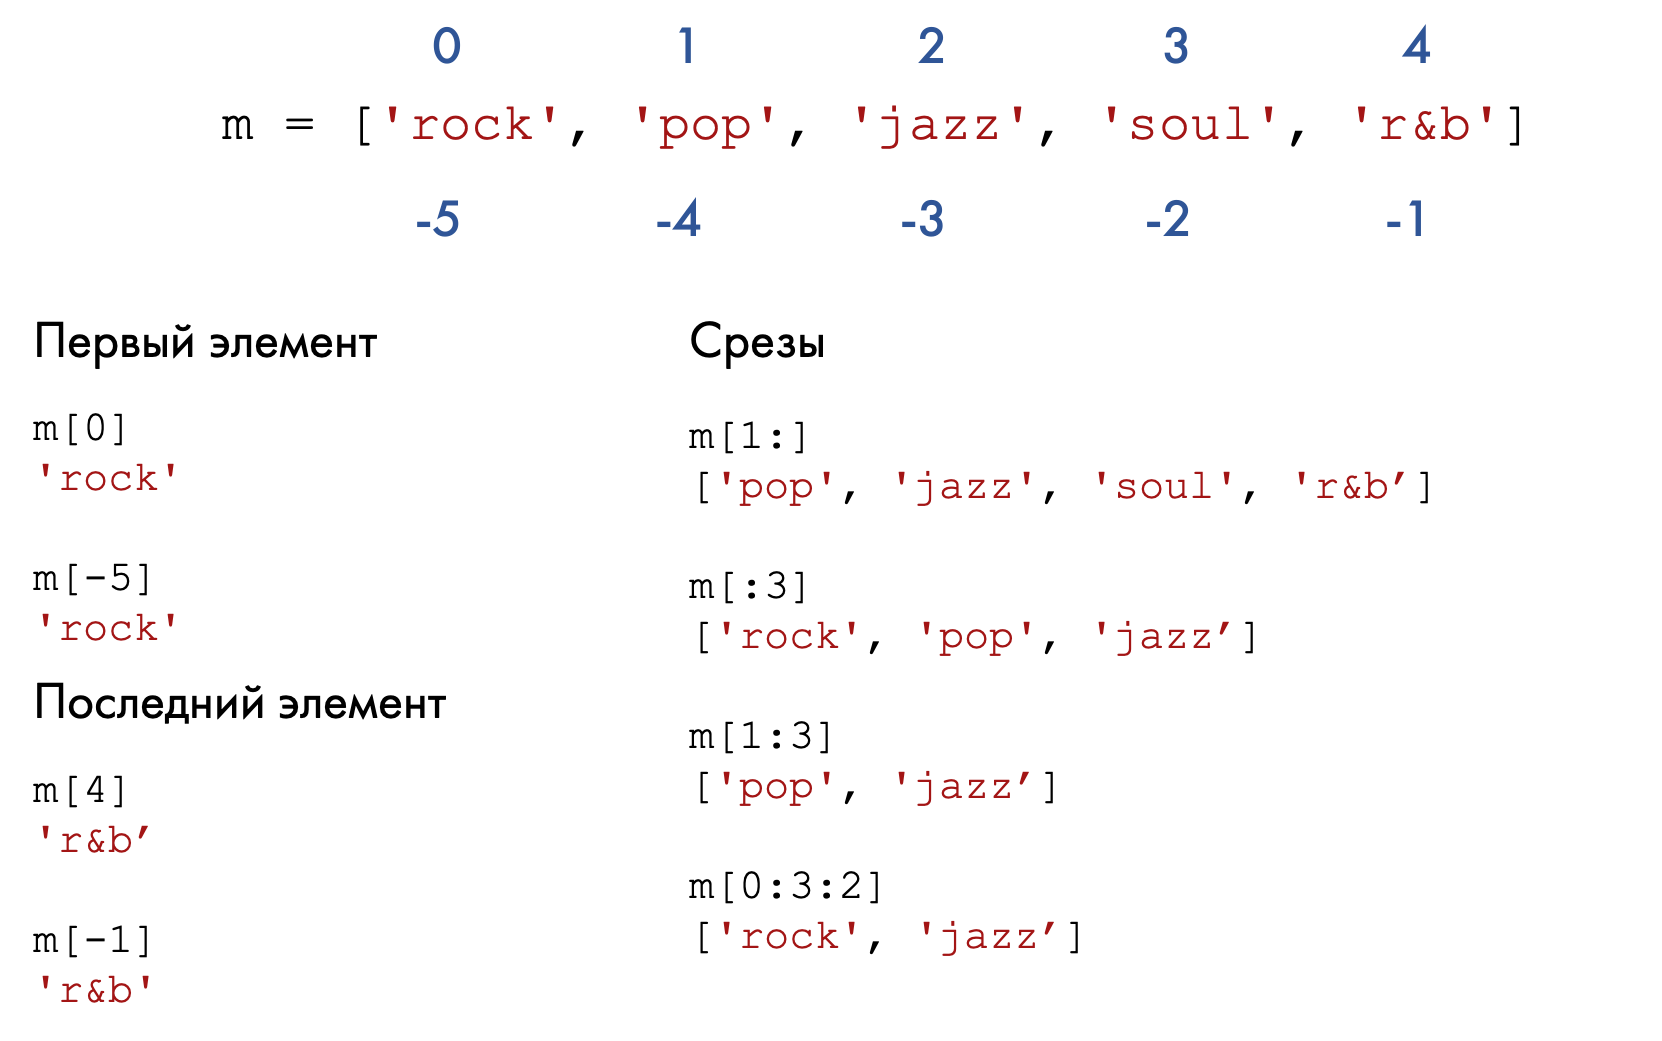

У срезов индексы следующие: `[START:END:STEP]`. Если `START` совпадает с началом строки, его можно не писать. Если `END` совпадает с концом строки, его можно не писать. Если `STEP`= 1, его можно не писать.
Всё как с функцией `range`.

In [ ]:
m = ['rock', 'pop', 'jazz', 'soul', 'r&b']
m[0:3:2]

['rock', 'jazz']

Со строками всё точно так же.

In [ ]:
s1 = 'rhythm'
s2 = '&'
s3 = 'blues'
print(s1[0] + s2[0] + s3[0])

r&b


In [ ]:
state = 'alabama'
print(state[0:7:2])
print(state[::2]) # здесь мы пропускаем индекс начала и индекс конца, т.к. они дефолтные — совпадают с началом и концом строки; результат такой же
print(state[::-1]) # похожим образом можно вывести строку задом наперёд

aaaa
aaaa
amabala


## И напоследок про `map()` <a name="par5"></a>

Вспомним про наш список `years`. Преобразовать все в целые числа можно еще и так:

In [ ]:
int_years_3 = list(map(int, years))
print(years)
print(int_years_3)

['1258', '1638', '1729', '982']
[1258, 1638, 1729, 982]


Что тут произошло? Функция `map()` буквально говорит: возьми функцию `int()` и примени ее ко всем элементам нашего списка. Возвращает нам объект типа `map`, который потом мы уже преобразовываем в список с помощью функции `list()`.

Функция `map()` может работать не только с встроенными функциями, но и с любыми другими, даже написанными именно нами.

In [ ]:
from math import sqrt

sqrt_years = list(map(sqrt, int_years_3))

print(int_years_3)
print(sqrt_years)

[1258, 1638, 1729, 982]
[35.4682957019364, 40.47221268969612, 41.58124577258358, 31.336879231984796]


Например, возьмем квадратный корень из всех наших значений.

В заключении скажем, что есть еще нечто, называемое безымянными функциями `lambda`, которые также работают с `map()`, но о них мы поговорим чуть позже, при обсуждении функций. Не переживаем, если все, что написано ниже, буде непонятно!! Мы разберемся со всем!

In [ ]:
plus_one_years = list(map(lambda x: x + 1, int_years_3))

print(int_years_3)
print(plus_one_years)

[1258, 1638, 1729, 982]
[1259, 1639, 1730, 983]


А и началось же все с того, что мы хотели максимальный год достать. Вот он:

In [ ]:
print(max(int_years))

1729


## PS: методы списков <a name="par6"></a>

*   Новый пункт
*   Новый пункт



Сейчас перечислим те методы, которые были упомянуты в онлайн-курсе, и методы, которые есть еще. И коротко о том, как они работают.

|Есть в онлайн-курсе | Все остальное |
|:--------------:|:-----:|
| `.append()` |  `.extend()` |
| `.count()`      |  `.insert()` |
| `.remove()`      |  `.pop()` |
| `.index()`      |  `.sort()` |
|     |  `.reverse()` |
|     |  `.copy()` |
|     |  `.clear()` |

Почти все они <u>изменяют исходный список</u>.

In [ ]:
# Метод .extend() добавляет в конец списка А все элементы списка B

A = [1, 2, 3, 4]
B = [5, 6, 7, 8]

A.extend(B)

print(A)

[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
# Метод .insert() добавляет в список А на место определенного индекса (2) новый элемент (строку 'new')

A = [1, 2, 3, 4]

A.insert(2, 'new')

print(A)

[1, 2, 'new', 3, 4]


In [ ]:
# Метод .pop() удаляет i-ый (2) элемент из списка А и возвращает его.
# Если индекс не указан, удаляется последний элемент

A = [1, 2, 3, 4]

get_element = A.pop(2)

print(get_element)
print(A)

3
[1, 2, 4]


In [ ]:
# Метод .sort() сортирует список А
# Метод .reverse() разворачивает список В

A = [1, 2, 3, 4]
B = [5, 6, 7, 8]

A.sort()
B.reverse()

print(A)
print(B)

[1, 2, 3, 4]
[8, 7, 6, 5]


In [ ]:
# Метод .copy() создает копию списка A
# Метод .clear() очищает список А

A = [1, 2, 3, 4]

B = A.copy()
A.clear()

print(A) # будет пустым
print(B) # а тут лежит копия

[]
[1, 2, 3, 4]


Не путайте списки с массивами (если кто-то встречался с таким словом). Массивы ограничены тем, что содержат в себе только один тип данных за раз, а в списках может быть сразу несколько. Возможно, чуть позже будет отдельный конспект именно по массивам.

## PPS Парочка методов строк

In [ ]:
s = 'Столица США - Вашингтон'
print(s)

Столица США - Вашингтон


In [ ]:
s1 = s.lower()
print(s1)

столица сша - вашингтон


In [ ]:
s2 = s.upper()
print(s2)

СТОЛИЦА США - ВАШИНГТОН


In [ ]:
s3 = s1.replace('-', '')
print(s3)

столица сша  вашингтон


In [ ]:
zaklyatie_smekhom = 'О, рассмейтесь, смехачи!\nО, засмейтесь, смехачи!\nЧто смеются смехами, что смеянствуют смеяльно,\nО, засмейтесь усмеяльно!\nО, рассмешищ надсмеяльных — смех усмейных смехачей!\nО, иссмейся рассмеяльно, смех надсмейных смеячей!\nСмейево, смейево!\nУсмей, осмей, смешики, смешики!\nСмеюнчики, смеюнчики.\nО, рассмейтесь, смехачи!\nО, засмейтесь, смехачи!'

In [ ]:
from collections import Counter # функция для подсчёта частот
zaklyatie_list = zaklyatie_smekhom.split()
zaklyatie_list
Counter(zaklyatie_list)

# что надо исправить?

Counter({'О,': 7,
         'рассмейтесь,': 2,
         'смехачи!': 4,
         'засмейтесь,': 2,
         'Что': 1,
         'смеются': 1,
         'смехами,': 1,
         'что': 1,
         'смеянствуют': 1,
         'смеяльно,': 1,
         'засмейтесь': 1,
         'усмеяльно!': 1,
         'рассмешищ': 1,
         'надсмеяльных': 1,
         '—': 1,
         'смех': 2,
         'усмейных': 1,
         'смехачей!': 1,
         'иссмейся': 1,
         'рассмеяльно,': 1,
         'надсмейных': 1,
         'смеячей!': 1,
         'Смейево,': 1,
         'смейево!': 1,
         'Усмей,': 1,
         'осмей,': 1,
         'смешики,': 1,
         'смешики!': 1,
         'Смеюнчики,': 1,
         'смеюнчики.': 1})

## Задача из банка заданий

Вы работаете аналитиком в торговой сети и изучаете суммарную прибыль по каждой из категории товаров. Найдите товар, приносящий максимальную суммарную прибыль.

ФОРМАТ ВВОДА

Записи о продаже товаров: название товара и, через запятую, полученная с этой продажи прибыль (целое число). Каждая запись вводится с новой строки. Название товара может содержать любые символы, кроме запятой.
Один товар могут продавать любое количество раз, но в каждой строке указывается информация только про одну продажу.
Когда записи заканчиваются, на отдельной строке вводится слово "END".

ФОРМАТ ВЫВОДА

Название товара, который принес наибольшую суммарную прибыль и, через пробел, сумма этой прибыли.
Гарантируется, что такой товар только один.

In [1]:
l1 = [] # заводим список товаров
l2 = [] # и список стоимостей
while True:
    s = input() # вводим без сплита, на случай, если первой же строчкой окажется END
    if s == 'END': # проверяем, не END ли наша строчка
        break
    s = s.split(',') # теперь сплитим
    if s[0] not in l1: # если товара нет в списке, добавляем; а во второй список добавляем его стоимость по тому же индексу
      l1.append(s[0])
      l2.append(int(s[1]))
    else:
      l2[l1.index(s[0])] += int(s[1]) # если товар есть в списке, то добавлять его не надо; а вот в списке стоимостей нужно увеличить стоимость по соответствующему индексу
print(l1[l2.index(max(l2))], max(l2)) # ну и вывести максимум

Шоколад,1000
Мармеладки,600
Шоколад,6000
Киндер-сюрприз,1000
Мармеладки,300
Мармеладки,4000
Мармеладки,50
Шоколад,400
END
Шоколад 7400


## Дополнительные материалы <a name="parlast"></a>

+ Документация Python [Built-in Types](https://docs.python.org/3/library/stdtypes.html)
+ Документация Python [More Control Flow Tools](https://docs.python.org/3/tutorial/controlflow.html)
+ Щуров И.В., Тамбовцева А.А., Жучкова С.В. —  курс «Основы программирования в Python» ([ссылка на курс](https://allatambov.github.io/pypolit/pypolit.html))
+ Статья на Хабр. [Понимание итераторов в Python](https://habr.com/ru/post/488112/)
+ [Цикл `for` в Python - как работает, синтаксис, примеры](https://pythonchik.ru/osnovy/cikl-for-v-python)
+ [Как работает функция `enumerate()` в Python?](https://pythonist.ru/kak-rabotaet-funkcziya-enumerate-v-python/)
+ Python для начинающих. [Про `try-except`](https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html)
+ Python для начинающих. [Все методы списков с примерами](https://pythonworld.ru/tipy-dannyx-v-python/spiski-list-funkcii-i-metody-spiskov.html)